In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_csv('diabetes 2.csv')

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
outcome = df['Outcome'].value_counts(normalize = True) *100

In [56]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [57]:
df['Outcome'].value_counts(normalize = True) *100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

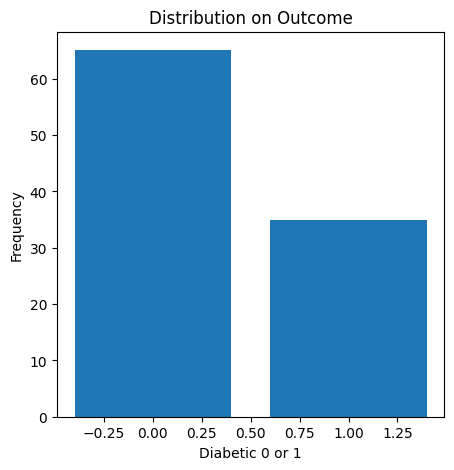

In [58]:
plt.figure(figsize=(5,5))
plt.bar(outcome.index,outcome.values)
plt.xlabel("Diabetic 0 or 1")
plt.ylabel("Frequency")
plt.title('Distribution on Outcome')
plt.show()

In [59]:
pregnancies = df['Pregnancies'].value_counts(normalize = True) *100
glucose = df['Glucose'].value_counts(normalize = True) *100
bp = df['BloodPressure'].value_counts(normalize = True) *100

In [60]:
df['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64


Feature Distributions:

Pregnancies Distribution:


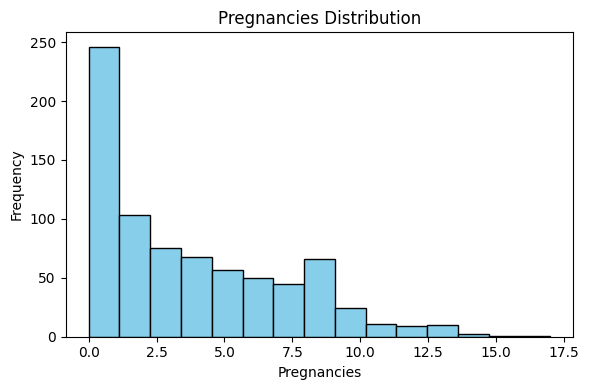


Glucose Distribution:


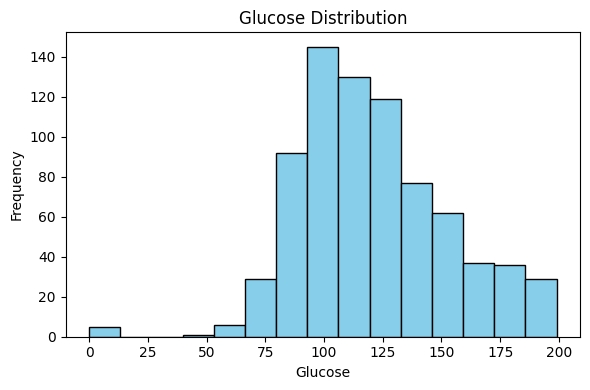


BloodPressure Distribution:


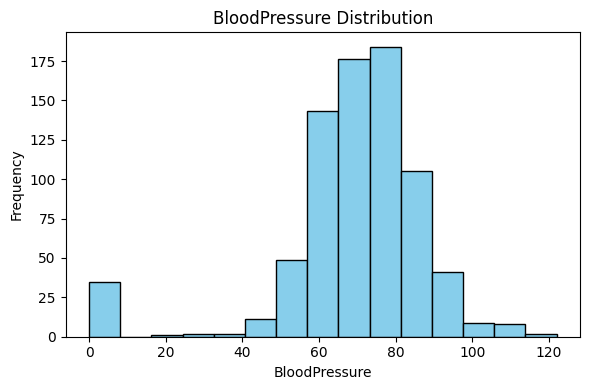


SkinThickness Distribution:


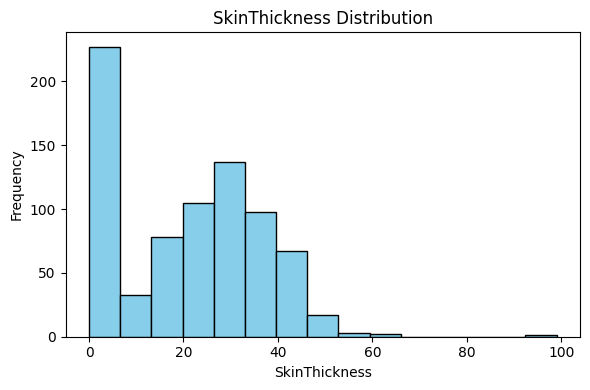


Insulin Distribution:


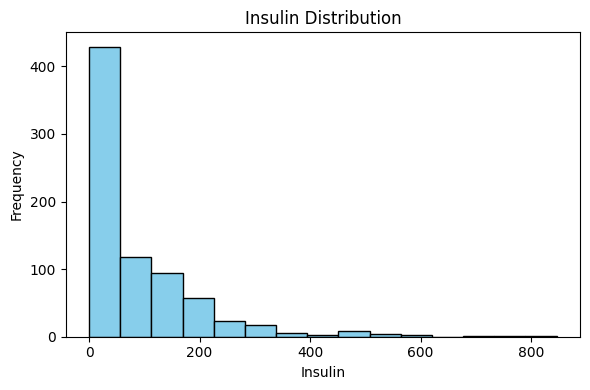


BMI Distribution:


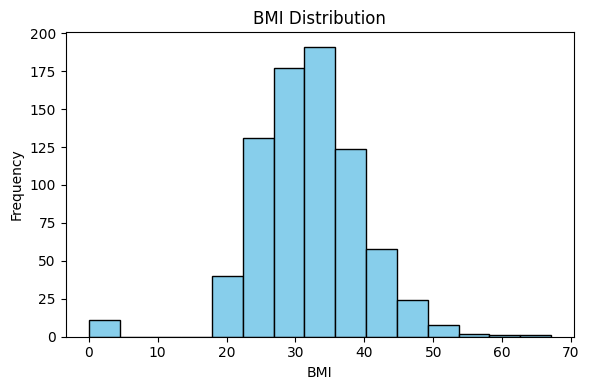


DiabetesPedigreeFunction Distribution:


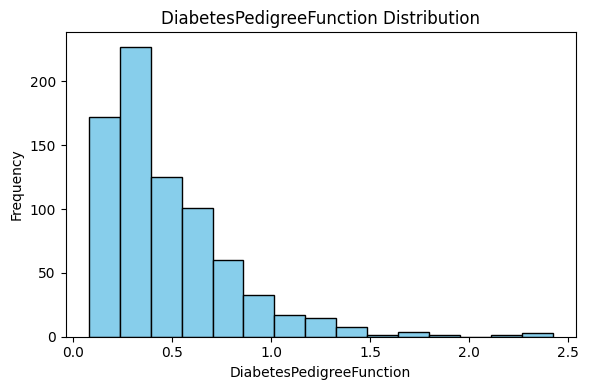


Age Distribution:


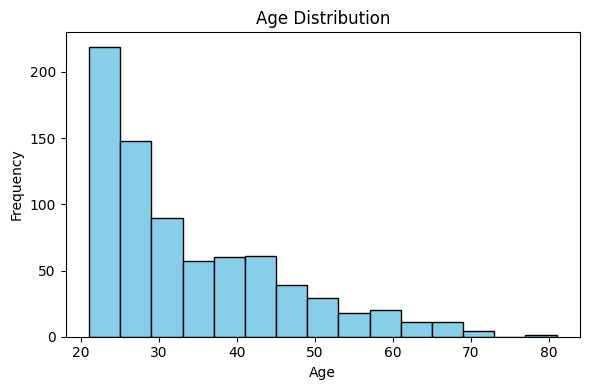

In [61]:
print("\nFeature Distributions:")
features = df.columns[:-1]  # Excluding the Outcome column
for feature in features:
    print(f"\n{feature} Distribution:")
    #print(df[feature].describe())  # Statistics for each feature
    plt.figure(figsize=(6,4))
    plt.hist(df[feature], bins=15, color = 'skyblue', edgecolor = 'black')
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Age and Diabetes Analysis:


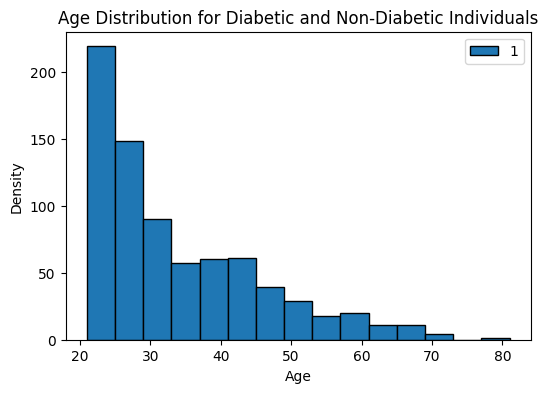


Age Statistics for Diabetic and Non-Diabetic Individuals:
         count       mean        std   min   25%   50%   75%   max
Outcome                                                           
0        500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0
1        268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0


In [62]:

    print("\nAge and Diabetes Analysis:")
    plt.figure(figsize=(6,4))
    plt.hist(df['Age'], bins=15, edgecolor = 'black')
    plt.title("Age Distribution for Diabetic and Non-Diabetic Individuals")
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.legend(df['Outcome'])
    plt.show()
    print("\nAge Statistics for Diabetic and Non-Diabetic Individuals:")
    print(df.groupby('Outcome')['Age'].describe())

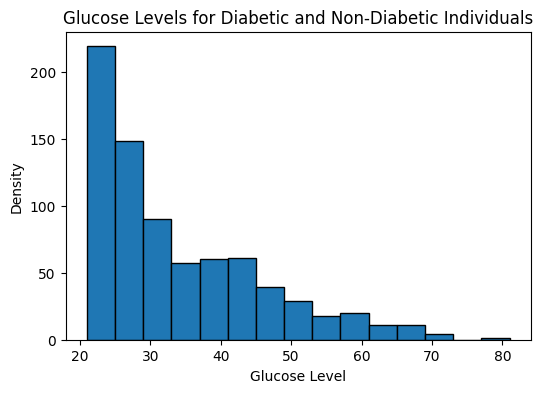


Glucose Level Statistics for Diabetic and Non-Diabetic Individuals:
         count        mean        std  min    25%    50%    75%    max
Outcome                                                               
0        500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1        268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0


In [63]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=15, edgecolor = 'black')
plt.title("Glucose Levels for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Glucose Level")
plt.ylabel("Density")
plt.show()
print("\nGlucose Level Statistics for Diabetic and Non-Diabetic Individuals:")
print(df.groupby('Outcome')['Glucose'].describe())

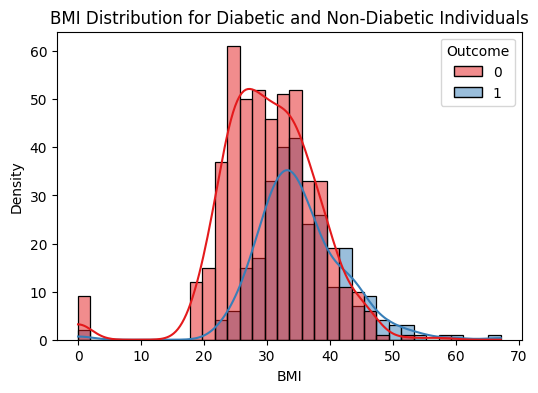

In [64]:
##  BMI and Diabetes:
# Distribution of BMI for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True, palette="Set1")
plt.title("BMI Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

In [65]:
# Statistics for BMI grouped by Outcome
print(df.groupby('Outcome')['BMI'].describe())

         count       mean       std  min   25%    50%     75%   max
Outcome                                                            
0        500.0  30.304200  7.689855  0.0  25.4  30.05  35.300  57.3
1        268.0  35.142537  7.262967  0.0  30.8  34.25  38.775  67.1



Pregnancies and Diabetes Analysis:


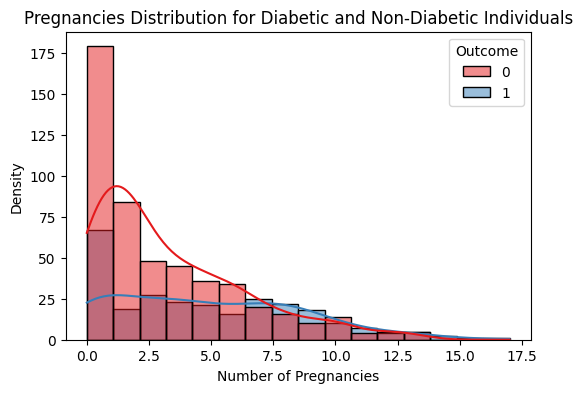

In [66]:
# 2. Pregnancies and Diabetes
print("\nPregnancies and Diabetes Analysis:")
# Distribution of Pregnancies for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, palette="Set1")
plt.title("Pregnancies Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Density")
plt.show()

In [67]:
# Statistics for Pregnancies grouped by Outcome
print(df.groupby('Outcome')['Pregnancies'].describe())

         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0



Blood Pressure Analysis:


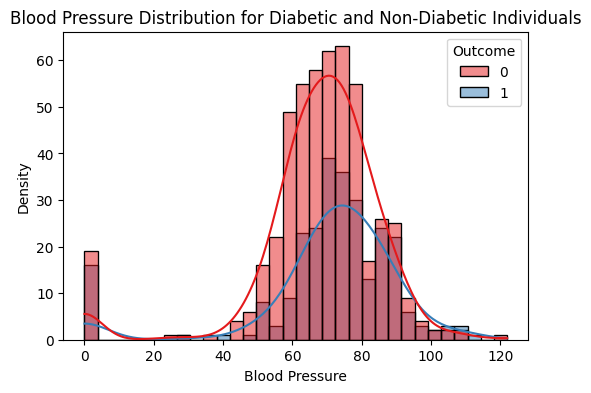

         count       mean        std  min   25%   50%   75%    max
Outcome                                                           
0        500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        268.0  70.824627  21.491812  0.0  66.0  74.0  82.0  114.0


In [68]:
# 3. Blood Pressure Analysis
print("\nBlood Pressure Analysis:")
# Distribution of Blood Pressure for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True, palette="Set1")
plt.title("Blood Pressure Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Blood Pressure")
plt.ylabel("Density")
plt.show()

# Statistics for Blood Pressure grouped by Outcome
print(df.groupby('Outcome')['BloodPressure'].describe())


Skin Thickness and Insulin Levels Analysis:


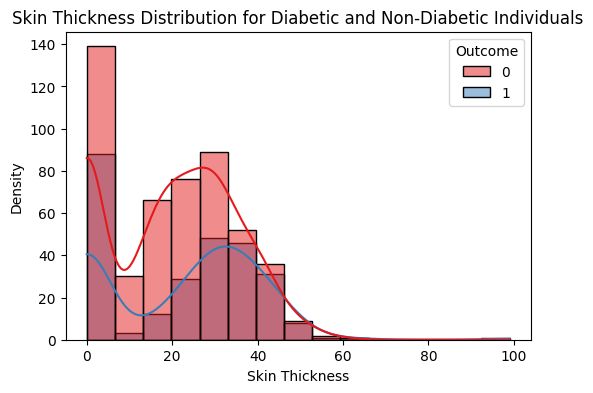

In [69]:
# 4. Skin Thickness and Insulin Levels
print("\nSkin Thickness and Insulin Levels Analysis:")
# Skin Thickness distribution for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='SkinThickness', hue='Outcome', kde=True, palette="Set1")
plt.title("Skin Thickness Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Skin Thickness")
plt.ylabel("Density")
plt.show()

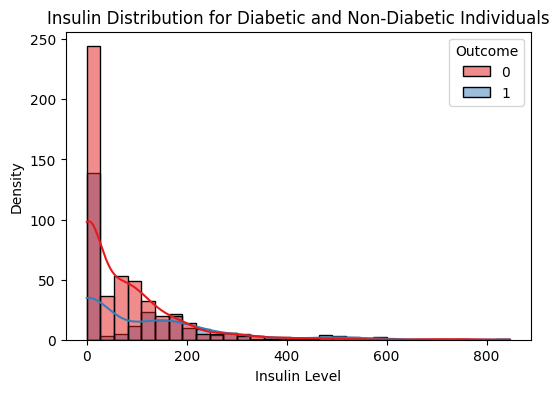

In [70]:
# Insulin distribution for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True, palette="Set1")
plt.title("Insulin Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Insulin Level")
plt.ylabel("Density")
plt.show()

In [71]:
# Statistics for Skin Thickness and Insulin grouped by Outcome
print(df.groupby('Outcome')['SkinThickness'].describe())
print(df.groupby('Outcome')['Insulin'].describe())

         count       mean        std  min  25%   50%   75%   max
Outcome                                                         
0        500.0  19.664000  14.889947  0.0  0.0  21.0  31.0  60.0
1        268.0  22.164179  17.679711  0.0  0.0  27.0  36.0  99.0
         count        mean         std  min  25%   50%     75%    max
Outcome                                                              
0        500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0
1        268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0



Diabetes Pedigree Function Analysis:


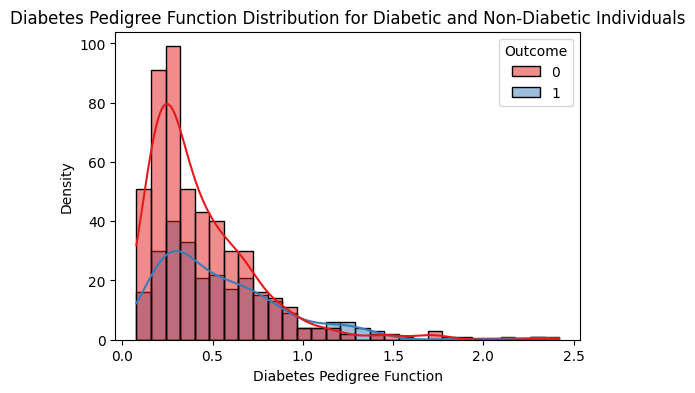

         count      mean       std    min      25%    50%      75%    max
Outcome                                                                  
0        500.0  0.429734  0.299085  0.078  0.22975  0.336  0.56175  2.329
1        268.0  0.550500  0.372354  0.088  0.26250  0.449  0.72800  2.420


In [72]:
# 5. Diabetes Pedigree Function
print("\nDiabetes Pedigree Function Analysis:")
# Distribution of Diabetes Pedigree Function for diabetic vs non-diabetic individuals
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, palette="Set1")
plt.title("Diabetes Pedigree Function Distribution for Diabetic and Non-Diabetic Individuals")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Density")
plt.show()

# Statistics for Diabetes Pedigree Function grouped by Outcome
print(df.groupby('Outcome')['DiabetesPedigreeFunction'].describe())

In [73]:
df2 = df

In [74]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [76]:
df3 = df2.drop(columns=['Pregnancies', 'DiabetesPedigreeFunction', 'Age','Outcome']  )

In [77]:
df3.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [78]:
df4 = df3.replace(to_replace = 0, value = np.NaN)

In [79]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in features:
    df4[feature].fillna(int(df4[feature].mean()), inplace=True) 
print(df4) 

     Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148.0           72.0           35.0    155.0  33.6
1       85.0           66.0           29.0    155.0  26.6
2      183.0           64.0           29.0    155.0  23.3
3       89.0           66.0           23.0     94.0  28.1
4      137.0           40.0           35.0    168.0  43.1
..       ...            ...            ...      ...   ...
763    101.0           76.0           48.0    180.0  32.9
764    122.0           70.0           27.0    155.0  36.8
765    121.0           72.0           23.0    112.0  26.2
766    126.0           60.0           29.0    155.0  30.1
767     93.0           70.0           31.0    155.0  30.4

[768 rows x 5 columns]


In [80]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,155.0,33.6
1,85.0,66.0,29.0,155.0,26.6
2,183.0,64.0,29.0,155.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,155.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,29.0,155.0,30.1


In [81]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,155.0,33.6
1,85.0,66.0,29.0,155.0,26.6
2,183.0,64.0,29.0,155.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,155.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,29.0,155.0,30.1


In [85]:
df4.insert(5,'Pregnancies',df2['Pregnancies'])

In [86]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies
0,148.0,72.0,35.0,155.0,33.6,6
1,85.0,66.0,29.0,155.0,26.6,1
2,183.0,64.0,29.0,155.0,23.3,8
3,89.0,66.0,23.0,94.0,28.1,1
4,137.0,40.0,35.0,168.0,43.1,0
...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,10
764,122.0,70.0,27.0,155.0,36.8,2
765,121.0,72.0,23.0,112.0,26.2,5
766,126.0,60.0,29.0,155.0,30.1,1


In [87]:
df4.insert(6,'DiabetesPedigreeFunction',df2['DiabetesPedigreeFunction'])

In [88]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction
0,148.0,72.0,35.0,155.0,33.6,6,0.627
1,85.0,66.0,29.0,155.0,26.6,1,0.351
2,183.0,64.0,29.0,155.0,23.3,8,0.672
3,89.0,66.0,23.0,94.0,28.1,1,0.167
4,137.0,40.0,35.0,168.0,43.1,0,2.288
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,10,0.171
764,122.0,70.0,27.0,155.0,36.8,2,0.340
765,121.0,72.0,23.0,112.0,26.2,5,0.245
766,126.0,60.0,29.0,155.0,30.1,1,0.349


In [89]:
df4.insert(6,'Age',df2['Age'])

In [90]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,DiabetesPedigreeFunction
0,148.0,72.0,35.0,155.0,33.6,6,50,0.627
1,85.0,66.0,29.0,155.0,26.6,1,31,0.351
2,183.0,64.0,29.0,155.0,23.3,8,32,0.672
3,89.0,66.0,23.0,94.0,28.1,1,21,0.167
4,137.0,40.0,35.0,168.0,43.1,0,33,2.288
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,10,63,0.171
764,122.0,70.0,27.0,155.0,36.8,2,27,0.340
765,121.0,72.0,23.0,112.0,26.2,5,30,0.245
766,126.0,60.0,29.0,155.0,30.1,1,47,0.349


In [91]:
df4.insert(8,'Outcome',df2['Outcome'])

In [92]:
df4

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,DiabetesPedigreeFunction,Outcome
0,148.0,72.0,35.0,155.0,33.6,6,50,0.627,1
1,85.0,66.0,29.0,155.0,26.6,1,31,0.351,0
2,183.0,64.0,29.0,155.0,23.3,8,32,0.672,1
3,89.0,66.0,23.0,94.0,28.1,1,21,0.167,0
4,137.0,40.0,35.0,168.0,43.1,0,33,2.288,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,10,63,0.171,0
764,122.0,70.0,27.0,155.0,36.8,2,27,0.340,0
765,121.0,72.0,23.0,112.0,26.2,5,30,0.245,0
766,126.0,60.0,29.0,155.0,30.1,1,47,0.349,1


In [93]:
df4.to_csv('Diabetes_cleaned.csv')